In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')

In [3]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df['ID'].head()

0    5008804
1    5008805
2    5008806
3    5008808
4    5008809
Name: ID, dtype: int64

In [5]:
df[df.CODE_GENDER == "M"]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2.0
438542,6837905,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0
438543,6837906,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0


In [6]:
df[(df.CODE_GENDER == "M") & (df['FLAG_OWN_CAR'] == "Y")]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438519,6836039,M,Y,N,0,157500.0,Working,Higher education,Married,House / apartment,-11619,-4149,1,0,0,0,Core staff,2.0
438539,6837454,M,Y,Y,1,162000.0,State servant,Secondary / secondary special,Married,House / apartment,-10890,-2675,1,0,0,0,Core staff,3.0
438542,6837905,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0
438543,6837906,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0


In [7]:
df[(df.CODE_GENDER == "M") & (df['FLAG_OWN_CAR'] == "Y") & (df['NAME_INCOME_TYPE'] == "Working") & (df['NAME_FAMILY_STATUS'] == "Married")]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
12,6153651,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
27,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438518,6835982,M,Y,Y,0,135000.0,Working,Incomplete higher,Married,House / apartment,-15293,-5244,1,1,1,0,NaN,2.0
438519,6836039,M,Y,N,0,157500.0,Working,Higher education,Married,House / apartment,-11619,-4149,1,0,0,0,Core staff,2.0
438542,6837905,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0
438543,6837906,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0


In [8]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [9]:
df = df.astype({"CNT_FAM_MEMBERS":'int', "AMT_INCOME_TOTAL":'int'}) 

In [10]:
df.dtypes

ID                      int64
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL        int64
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
DAYS_BIRTH              int64
DAYS_EMPLOYED           int64
FLAG_MOBIL              int64
FLAG_WORK_PHONE         int64
FLAG_PHONE              int64
FLAG_EMAIL              int64
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS         int64
dtype: object

In [11]:
df['CODE_GENDER'].replace('M',0,inplace=True)
df['CODE_GENDER'].replace('F',1,inplace=True)
df['FLAG_OWN_CAR'].replace('Y',0,inplace=True)
df['FLAG_OWN_CAR'].replace('N',1,inplace=True)
df['FLAG_OWN_REALTY'].replace('Y',0,inplace=True)
df['FLAG_OWN_REALTY'].replace('N',1,inplace=True)

In [12]:
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].astype('category')
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].astype('category')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].astype('category')
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].astype('category')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].astype('category')

In [13]:
df.dtypes

ID                        int64
CODE_GENDER               int64
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL          int64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS           int64
dtype: object

In [14]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,0,0,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,0,0,0,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,0,0,0,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,1,1,0,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,1,1,0,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [15]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [16]:
df = df.dropna(how='any',axis=0)

In [17]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [18]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,0,0,0,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,1,1,0,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,1,1,0,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,1,1,0,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,1,1,0,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [19]:
df.groupby('FLAG_OWN_CAR').mean().head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
FLAG_OWN_CAR,,,,,,,,,,,,
0,6.023089e+06,0.434787,0.310990,0.580477,219006.114321,-14525.395972,-2499.961732,1.0,0.229871,0.280010,0.126651,2.423789
1,6.022910e+06,0.760648,0.322395,0.461805,177789.921798,-15005.908165,-2708.229904,1.0,0.261086,0.289485,0.111084,2.208978


<AxesSubplot:xlabel='FLAG_EMAIL'>

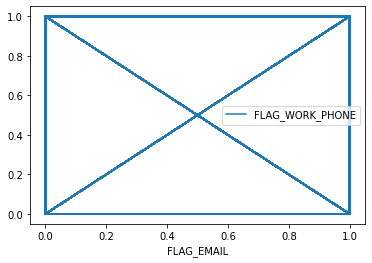

In [20]:
df.loc[df.NAME_INCOME_TYPE == 'Commercial associate'].plot(x='FLAG_EMAIL', y='FLAG_WORK_PHONE')

<AxesSubplot:>

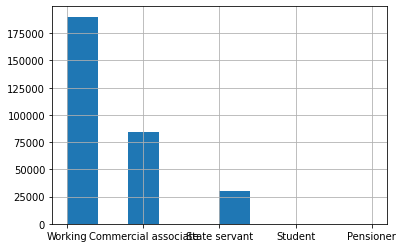

In [21]:
df['NAME_INCOME_TYPE'].hist()

<AxesSubplot:>

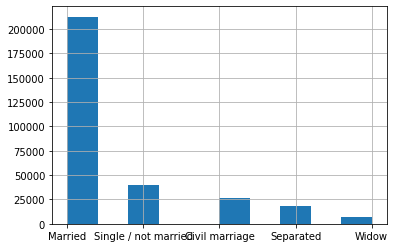

In [22]:
df['NAME_FAMILY_STATUS'].hist()

<AxesSubplot:>

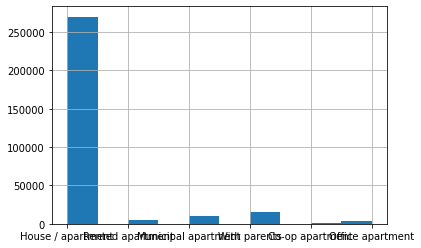

In [23]:
df['NAME_HOUSING_TYPE'].hist()

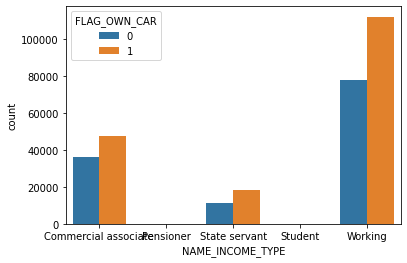

In [24]:
from pylab import rcParams
sns.countplot(x='NAME_INCOME_TYPE',hue='FLAG_OWN_CAR',data=df)
rcParams['figure.figsize'] = 25, 10

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

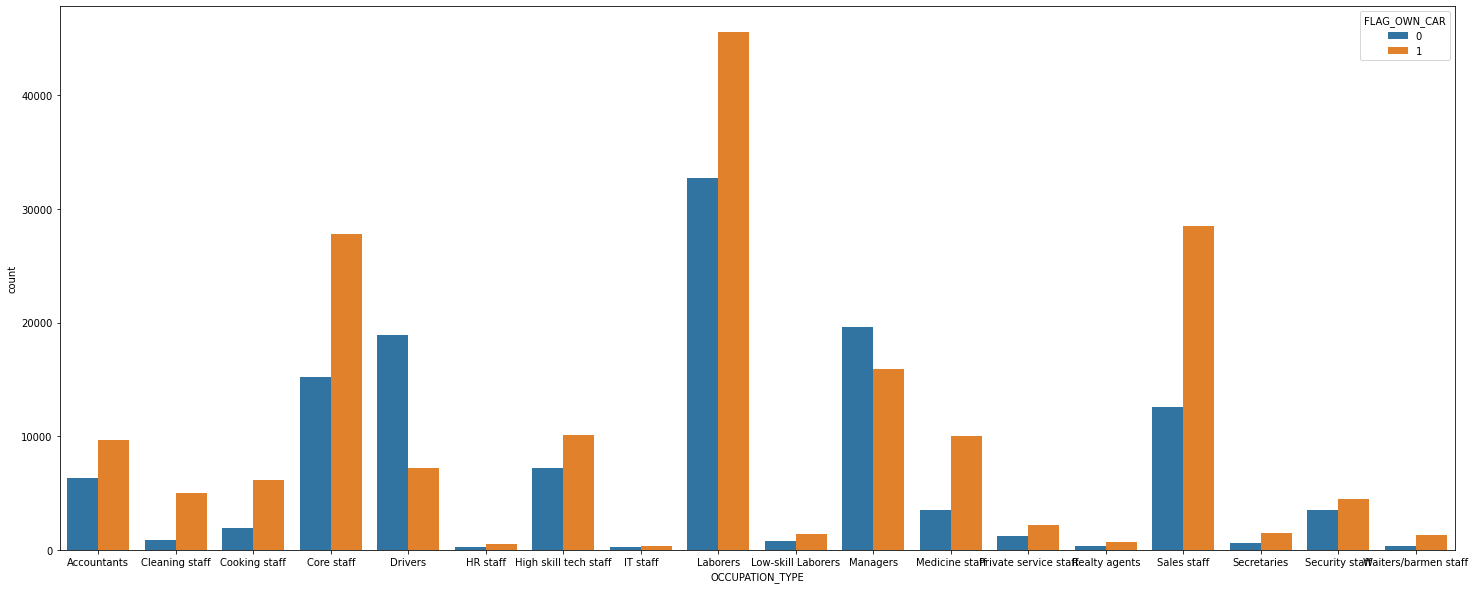

In [25]:
sns.countplot(x='OCCUPATION_TYPE',hue='FLAG_OWN_CAR',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


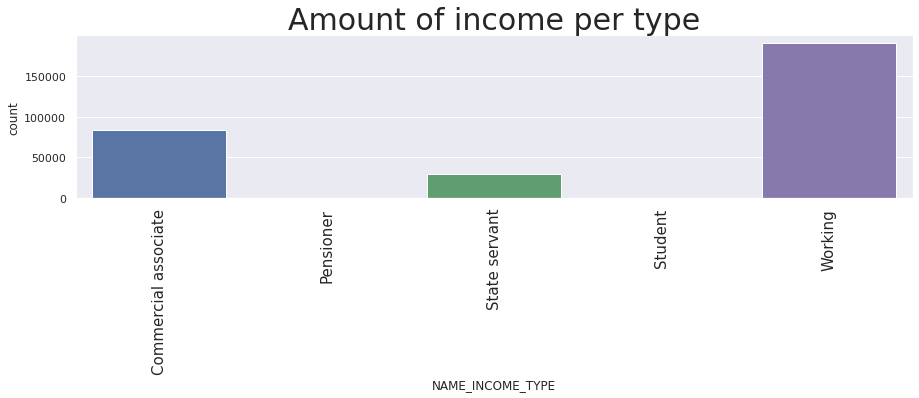

In [26]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['NAME_INCOME_TYPE'],hue_order=df.groupby('NAME_INCOME_TYPE'))
p.axes.set_title("Amount of income per type",fontsize=30)
plt.show()

Annual Income

(2.027, 69.93]      303154
(69.93, 137.16]       1073
(137.16, 204.39]        80
(204.39, 271.62]         7
(271.62, 338.85]        11
(338.85, 406.08]        12
(406.08, 473.31]        10
(473.31, 540.54]         0
(540.54, 607.77]         0
(607.77, 675.0]          7
Name: AMT_INCOME_TOTAL, dtype: int64


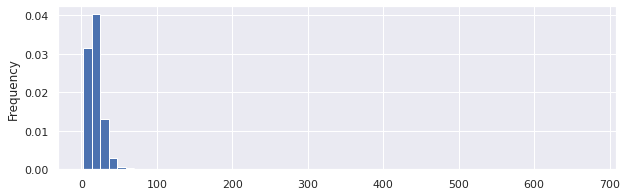

In [27]:
sns.set(rc={'figure.figsize':(10,3)})
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL'].astype(object)
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL']/10000 
print(df['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
df['AMT_INCOME_TOTAL'].plot(kind='hist',bins=60,density=True)
plt.show()

Age

(19.951999999999998, 24.7]    0.027862
(24.7, 29.4]                  0.131097
(29.4, 34.1]                  0.165206
(34.1, 38.8]                  0.139942
(38.8, 43.5]                  0.177543
(43.5, 48.2]                  0.141345
(48.2, 52.9]                  0.097469
(52.9, 57.6]                  0.082361
(57.6, 62.3]                  0.030077
(62.3, 67.0]                  0.007097
Name: Age, dtype: float64


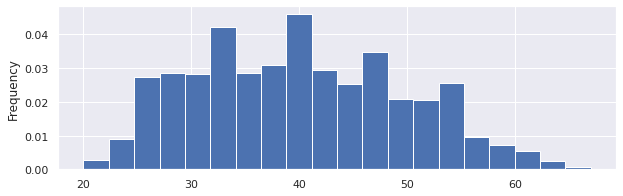

In [28]:
sns.set(rc={'figure.figsize':(10,3)})
df['Age']=-(df['DAYS_BIRTH'])//365	
print(df['Age'].value_counts(bins=10,normalize=True,sort=False))
df['Age'].plot(kind='hist',bins=20,density=True)
plt.show()